In [9]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [11]:
# --- Step 2: Load Dataset ---
try:
    df = pd.read_csv("diabetes.csv")
    print("✅ Dataset loaded successfully!")
except:
    print("⚠️ Using sample dataset instead.")
    df = pd.DataFrame({
        'Pregnancies': [6,1,8,1,0],
        'Glucose': [148,85,183,89,137],
        'BloodPressure': [72,66,64,66,40],
        'SkinThickness': [35,29,0,23,35],
        'Insulin': [0,0,0,94,168],
        'BMI': [33.6,26.6,23.3,28.1,43.1],
        'DiabetesPedigreeFunction': [0.627,0.351,0.672,0.167,2.288],
        'Age': [50,31,32,21,33],
        'Outcome': [1,0,1,0,1]
    })

⚠️ Using sample dataset instead.



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               5 non-null      int64  
 1   Glucose                   5 non-null      int64  
 2   BloodPressure             5 non-null      int64  
 3   SkinThickness             5 non-null      int64  
 4   Insulin                   5 non-null      int64  
 5   BMI                       5 non-null      float64
 6   DiabetesPedigreeFunction  5 non-null      float64
 7   Age                       5 non-null      int64  
 8   Outcome                   5 non-null      int64  
dtypes: float64(2), int64(7)
memory usage: 492.0 bytes

📈 Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
count     5.000000    5.000000       5.000000       5.000000    5.00000   
mean      3.200000  128.400000      61.600000    

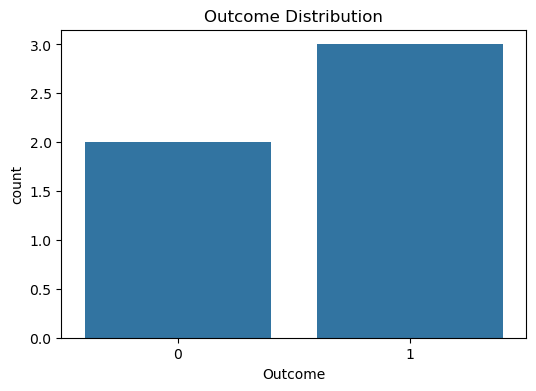

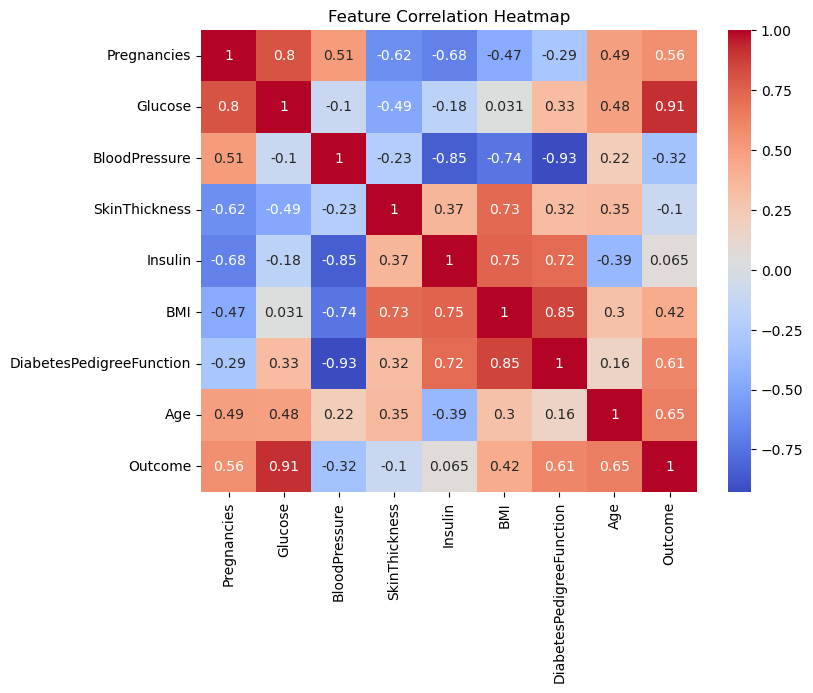

In [12]:

# --- Step 3: EDA ---
print("\n📊 Dataset Info:")
df.info()

print("\n📈 Statistical Summary:")
print(df.describe())

plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [14]:
# --- Step 4: Data Preparation ---
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:

# --- Step 5: Simple ANN (MLPClassifier) ---
model = MLPClassifier(hidden_layer_sizes=(12,8), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(12, 8), max_iter=500, random_state=42)

In [16]:
# --- Step 6: Evaluate ---
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ ANN Model Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ ANN Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

